In [1]:
import re
import pandas as pd
import requests

from bs4 import BeautifulSoup
from pathlib import Path
from config_local import DATA_DIR
from content_parsing import get_text_v3


In [2]:
test_url = "https://www.aljazeera.com/news/2024/3/6/trumps-talk-on-gaza-highlights-stark-choice-for-voters-in-us-election"
page = requests.get(test_url)

soup = BeautifulSoup(page.content, "html.parser")
main_content = soup.find("main", id="main-content-area")

print(main_content.text)


News|Israel War on GazaTrump’s Gaza comments highlight tough choice for peace-supporting US votersFormer president’s rhetoric shows voters seeking to punish Joe Biden for backing Israel face dilemma in upcoming election.Republican presidential frontrunner Donald Trump speaks at a Super Tuesday election night party, on March 5, 2024, at Mar-a-Lago in Palm Beach, Florida. [Rebecca Blackwell/AP Photo]Published On 6 Mar 20246 Mar 2024Donald Trump has voiced explicit backing for Israel’s war on Gaza, suggesting that he supports the goal expressed by the hardline government in Tel Aviv of continuing the assault until “total victory”.
Asked if he is “on board” with the way Israel was “taking the fight to Gaza”, the frontrunner for the Republican US presidential nomination responded: “You’ve got to finish the problem”. With Trump set to race incumbent Joe Biden, his words suggest that voters opposed to United States support of Israel’s war will face a dilemma in November’s presidential electio

In [3]:
for s in soup.find("main"):
    
    is_content = False
    # skip non-class objects
    if not s.get("class"):
        continue

    
    # search for "all-content" object
    for c in s["class"]:
        if re.search("all-content", c):
            is_content = True

    if is_content:
        text = []
        for p in s.find_all("p"):
            text.append(p.text)

    

print(text)


['Donald Trump has voiced explicit backing for Israel’s war on Gaza, suggesting that he supports the goal expressed by the hardline government in Tel Aviv of continuing the assault until “total victory”.', 'Asked if he is “on board” with the way Israel was “taking the fight to Gaza”, the frontrunner for the Republican US presidential nomination responded: “You’ve got to finish the problem”. With Trump set to race incumbent Joe Biden, his words suggest that voters opposed to United States support of Israel’s war will face a dilemma in November’s presidential election.', 'The interview with Fox News where Trump made the comments took place as his path to the presidential nomination was all but cleared on Super Tuesday. Shortly after being soundly beaten in most primaries across the country, his only serious challenger, Nikki Haley, was expected to quit.', 'Trump’s statement also came as Biden‘s support appears to be wobbling. While the president won almost all the Democratic nominating c

In [4]:
aljazeera_urls = pd.read_csv(Path(DATA_DIR, "mc_aljazeera_01082022_10032024.csv"))
aljazeera_urls.head()


,archived_url,article_url,id,language,media_name,media_url,publish_date,title,url,indexed_date,date_time
0,https://web.archive.org/web/20221010214845/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221010214845,en,aljazeera.com,http://aljazeera.com,2022-10-10 00:00:00,Musk praised by Chinese diplomat over controve...,https://www.aljazeera.com/economy/2022/10/10/m...,NaN,2022-10-10
1,https://web.archive.org/web/20221011065555/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221011065555,en,aljazeera.com,http://aljazeera.com,2022-10-10 00:00:00,Singtel unit faces cyberattack weeks after Opt...,https://www.aljazeera.com/economy/2022/10/10/s...,NaN,2022-10-10
2,https://web.archive.org/web/20221011074457/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221011074457,en,aljazeera.com,http://aljazeera.com,2022-10-10 00:00:00,UAE president to meet Russia’s Vladimir Putin ...,https://www.aljazeera.com/economy/2022/10/10/u...,NaN,2022-10-10
3,https://web.archive.org/web/20221012062930/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221012062930,en,aljazeera.com,http://aljazeera.com,2022-10-11 00:00:00,Australia to avoid recession amid ‘dangerous’ ...,https://www.aljazeera.com/economy/2022/10/11/a...,NaN,2022-10-11
4,https://web.archive.org/web/20221012064231/htt...,https://wayback-api.archive.org/colsearch/v1/m...,20221012064231,en,aljazeera.com,http://aljazeera.com,2022-10-11 00:00:00,Biden labour proposal could shake up gig economy,https://www.aljazeera.com/economy/2022/10/11/b...,NaN,2022-10-11


In [5]:
for row in aljazeera_urls.head(10).itertuples():
    page = requests.get(row.url)
    article = BeautifulSoup(page.content, "html.parser")
    content = get_text_v3(article)

    print(row.url)
    print(len(content.split()))
    print()


https://www.aljazeera.com/economy/2022/10/10/musk-praised-by-chinese-diplomat-over-controversial-taiwan-plan
338

https://www.aljazeera.com/economy/2022/10/10/singtel-unit-faces-cyber-attack-weeks-after-optus-data-breach
140

https://www.aljazeera.com/economy/2022/10/10/uae-president-to-meet-russias-vladimir-putin-on-tuesday
485

https://www.aljazeera.com/economy/2022/10/11/australia-to-avoid-recession-amid-dangerous-outlook-govt-says
230

https://www.aljazeera.com/economy/2022/10/11/biden-labour-proposal-to-shake-up-gig-economy
562

https://www.aljazeera.com/economy/2022/10/11/hong-kong-leader-says-no-legal-basis-to-seize-russian-megayacht
347

https://www.aljazeera.com/economy/2022/10/11/hyundai-kia-parts-supplier-in-alabama-fined-for-child-labor
340

https://www.aljazeera.com/economy/2022/10/11/imf-cuts-2023-global-outlook-amid-colliding-global-shocks
703

https://www.aljazeera.com/economy/2022/10/11/south-korea-improving-on-inequality-hong-kong-slipping-oxfam
426

https://www.aljaz

In [6]:
df = pd.read_csv("output.csv")
df.id = df.id.astype(str)

FileNotFoundError: [Errno 2] No such file or directory: 'output.csv'

In [ ]:
df

,id,url,title,retrieval_time,full_text,word_count
0,20221010214845,https://www.aljazeera.com/economy/2022/10/10/m...,Musk praised by Chinese diplomat over controve...,2024-03-21 16:08:22.474740,"“Taiwan sells many products, but our freedom a...",338.0
1,20221011065555,https://www.aljazeera.com/economy/2022/10/10/s...,Singtel unit faces cyberattack weeks after Opt...,2024-03-21 16:08:22.522040,"Singtel said on Monday the attack on Dialog, a...",140.0
2,20221011074457,https://www.aljazeera.com/economy/2022/10/10/u...,UAE president to meet Russia’s Vladimir Putin ...,2024-03-21 16:08:22.590116,United Arab Emirates President Sheikh Mohammed...,485.0
3,20221012062930,https://www.aljazeera.com/economy/2022/10/11/a...,Australia to avoid recession amid ‘dangerous’ ...,2024-03-21 16:08:22.672653,Australia should be able to avoid a recession ...,230.0
4,20221012064231,https://www.aljazeera.com/economy/2022/10/11/b...,Biden labour proposal could shake up gig economy,2024-03-21 16:08:22.724284,"Gig company stocks were hammered on the news, ...",562.0
...,...,...,...,...,...,...
1479,20221017230006,https://www.aljazeera.com/news/2022/10/16/us-c...,"Canada, US send military equipment to crisis-t...",2024-03-27 16:47:51.041269,The equipment is to help the national police t...,519.0
1480,20221117074054,https://www.aljazeera.com/news/2022/11/16/ivor...,Ivory Coast to withdraw from UN peacekeeping f...,2024-03-27 16:47:52.618492,Ivory Coast is embroiled in a diplomatic dispu...,340.0
1481,20221215070855,https://www.aljazeera.com/news/2022/12/14/roya...,Royal Air Maroc cancels flights to Doha before...,2024-03-27 16:47:54.181420,The decision could leave hundreds of Moroccan ...,461.0
1482,20220818071351,https://www.aljazeera.com/news/2022/8/17/russi...,"Russia-Ukraine war: List of key events, day 175",2024-03-27 16:47:55.274273,As the Russia-Ukraine war enters its 175th day...,270.0


In [ ]:
df2 = pd.merge(df, aljazeera_urls.loc[:, ["id", "publish_date"]], how="left", on="id")
df2["date_time"] = pd.to_datetime(df2.publish_date)


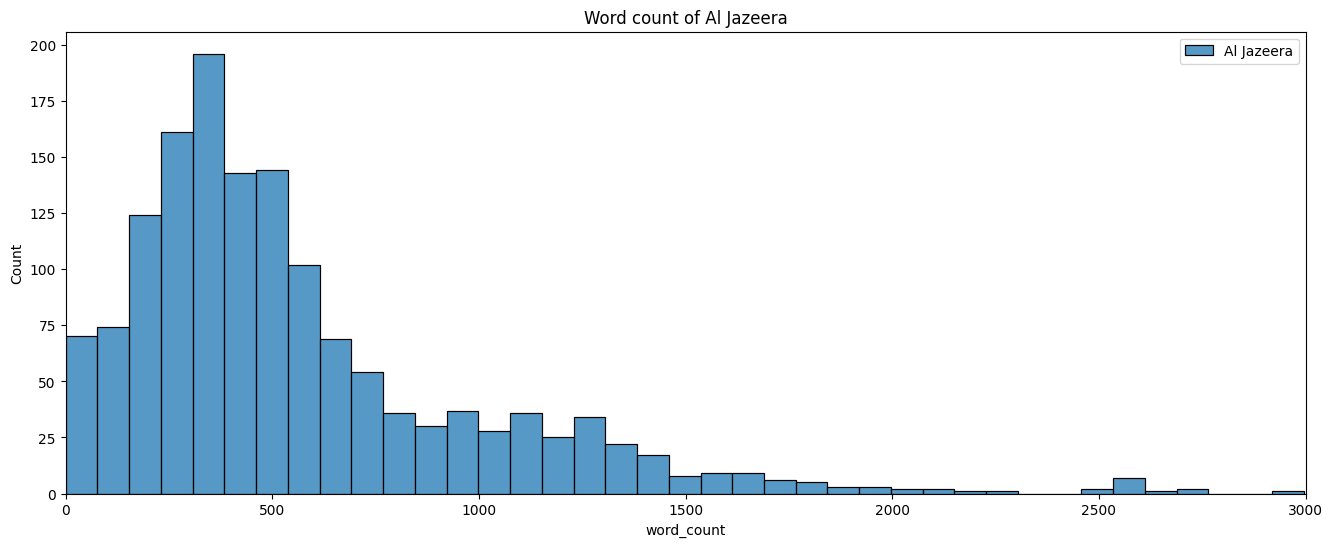

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16, 6))

sns.histplot(df, x="word_count", label="Al Jazeera")
ax.set_xlim((0, 3000))
plt.title("Word count of Al Jazeera")
plt.legend()
plt.show()

In [ ]:
weekly_word_count = df2.groupby(pd.Grouper(key='date_time', freq='W')).mean("word_count") 
weekly_article_count = df2.groupby(pd.Grouper(key='date_time', freq='W')).id.count()
weekly_stats = pd.merge(weekly_word_count, weekly_article_count, how="left", on="date_time")

weekly_stats.head()

,word_count,id
date_time,,
2022-08-07,715.908451,142
2022-08-14,653.408377,191
2022-08-21,773.764706,170
2022-08-28,455.793651,63
2022-09-04,755.775510,49


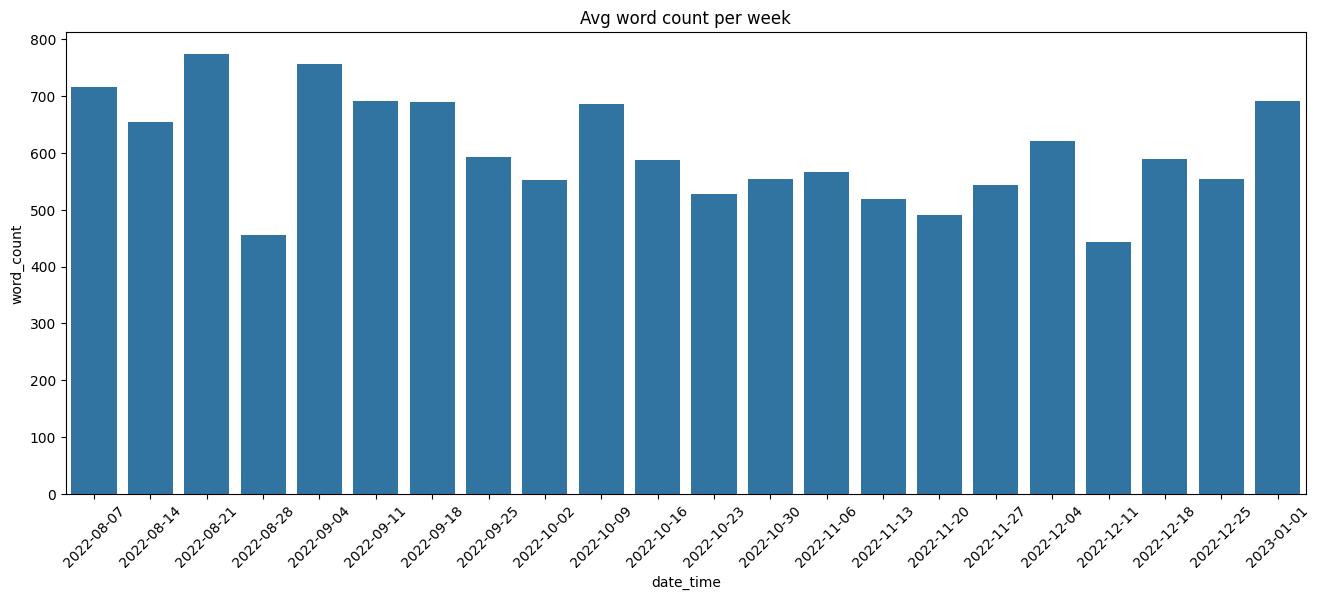

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.barplot(weekly_stats, x="date_time", y="word_count")
ax.tick_params("x", labelrotation=45)
plt.title("Avg word count per week")
plt.show()

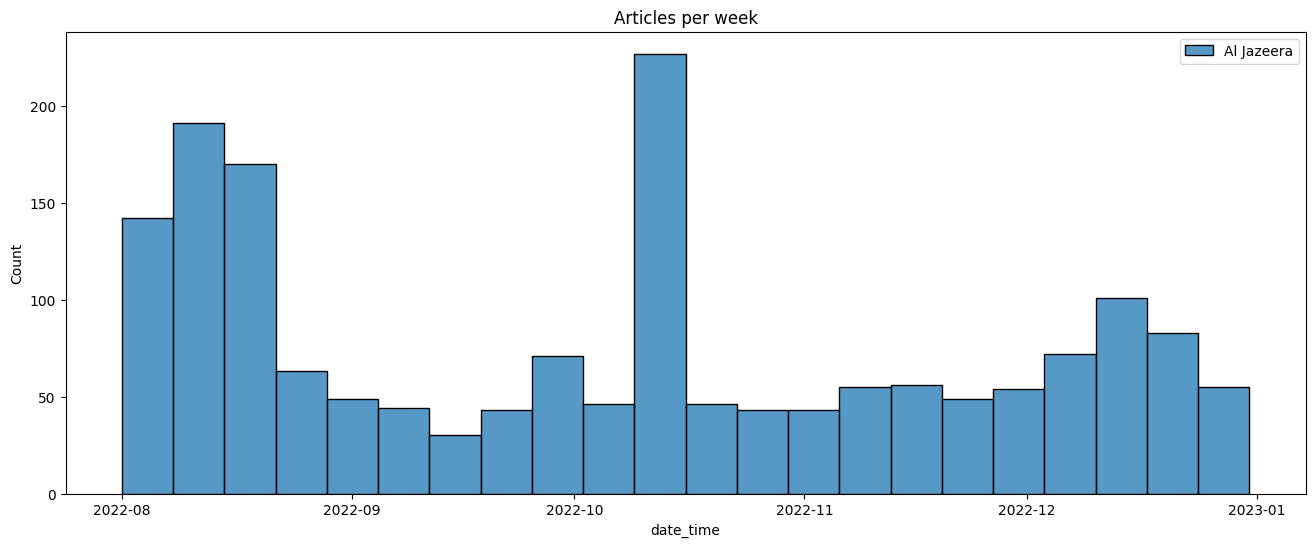

In [ ]:
fig, ax = plt.subplots(figsize=(16, 6))

sns.histplot(df2, x="date_time", label="Al Jazeera", binwidth=7)
plt.title("Articles per week")
plt.legend()
plt.show()

In [ ]:
url = "https://www.aljazeera.com/gallery/2022/9/14/photos-fire-crews-battle-massive-blazes-across-us-west"

page = requests.get(url)
article = BeautifulSoup(page.content, "html.parser")
content = get_text_v3(article)


if not article.find("p"):
    raise ValueError("No paragraphs found.")

paragraphs = article.find_all("p")

text = []
for p in paragraphs:
    text.append(p.text)

full_text = "\n\n".join(text)


In [ ]:
paragraphs

[<p class="gallery-header__title">In Pictures</p>,
 <p>Dozens of active fires in California, Idaho, Oregon, Washington and other states in the western United States have <a href="/news/2022/9/12/thousands-evacuated-as-wildfires-spread-across-western-us">ravaged more than 3,100 sq km</a> (1,200sq miles), highlighting the devastating effects of a two-decade-plus drought that has left the region parched.</p>,
 <p>Dense smoke blanketed towns in southwestern Oregon, including the popular outdoor tourism gateway of Bend, as the Cedar Creek Fire continued to grow this week.</p>,
 <p>The blaze had consumed 155,297 acres (62,846 hectares) as of Tuesday afternoon, according to the Oregon State Fire Marshal, but was only 15 percent contained. Evacuations were ordered for a few Oregon counties, although some orders were eased amid cooler weather and gentler winds.</p>,
 <p>The inferno – which began back in early August – has turned skies an eerie orange, as more than 1,200 firefighters and other p

In [ ]:
print(full_text)

In Pictures

Dozens of active fires in California, Idaho, Oregon, Washington and other states in the western United States have ravaged more than 3,100 sq km (1,200sq miles), highlighting the devastating effects of a two-decade-plus drought that has left the region parched.

Dense smoke blanketed towns in southwestern Oregon, including the popular outdoor tourism gateway of Bend, as the Cedar Creek Fire continued to grow this week.

The blaze had consumed 155,297 acres (62,846 hectares) as of Tuesday afternoon, according to the Oregon State Fire Marshal, but was only 15 percent contained. Evacuations were ordered for a few Oregon counties, although some orders were eased amid cooler weather and gentler winds.

The inferno – which began back in early August – has turned skies an eerie orange, as more than 1,200 firefighters and other personnel converged on the steep mountainous terrain, much of it in US national forest land and hard to reach.

Scientists have said the long-term drought 

In [12]:
df = pd.read_csv(Path(DATA_DIR, "tests", "test_output_random_sample.csv"))

In [13]:
for row in df.head().itertuples():
    
    print(row.full_text)

    print("\n\n----------------------------------------------\n\n")


Taiwanese diplomat says democracy ‘not for sale’ after Tesla CEO suggests handing some control of island to Beijing.
China’s ambassador to the United States thanked Elon Musk for proposing a special administration zone for Taiwan, while Taiwan’s de facto ambassador to Washington reprimanded the billionaire saying its “freedom and democracy are not for sale”.
“Taiwan sells many products, but our freedom and democracy are not for sale,” Hsiao Bi-khim, Taiwan’s de facto ambassador to Washington, tweeted on Saturday. “Any lasting proposal for our future must be determined peacefully, free from coercion, and respectful of the democratic wishes of the people of Taiwan.”
Days after floating a possible deal to end the war between Russia and Ukraine that drew condemnation in Ukraine, Musk suggested tensions between China and Taiwan could be resolved by handing over some control of Taiwan to Beijing.
“My recommendation . . . would be to figure out a special administrative zone for Taiwan that is

In [14]:
for row in df.head().itertuples():
    lines = row.full_text.split("\n")
    for line in lines:
        if line=="":
            continue
        if line=="Follow Al Jazeera English:":
            continue
        print(line)


    print("\n\n----------------------------------------------\n\n")


Taiwanese diplomat says democracy ‘not for sale’ after Tesla CEO suggests handing some control of island to Beijing.
China’s ambassador to the United States thanked Elon Musk for proposing a special administration zone for Taiwan, while Taiwan’s de facto ambassador to Washington reprimanded the billionaire saying its “freedom and democracy are not for sale”.
“Taiwan sells many products, but our freedom and democracy are not for sale,” Hsiao Bi-khim, Taiwan’s de facto ambassador to Washington, tweeted on Saturday. “Any lasting proposal for our future must be determined peacefully, free from coercion, and respectful of the democratic wishes of the people of Taiwan.”
Days after floating a possible deal to end the war between Russia and Ukraine that drew condemnation in Ukraine, Musk suggested tensions between China and Taiwan could be resolved by handing over some control of Taiwan to Beijing.
“My recommendation . . . would be to figure out a special administrative zone for Taiwan that is

In [15]:
for row in df.itertuples():
    lines = row.full_text.split("\n")
    for line in lines:
        if line=="":
            continue
        if line=="Follow Al Jazeera English:":
            continue
        if line=="In Pictures":
            print("Gallery!")


